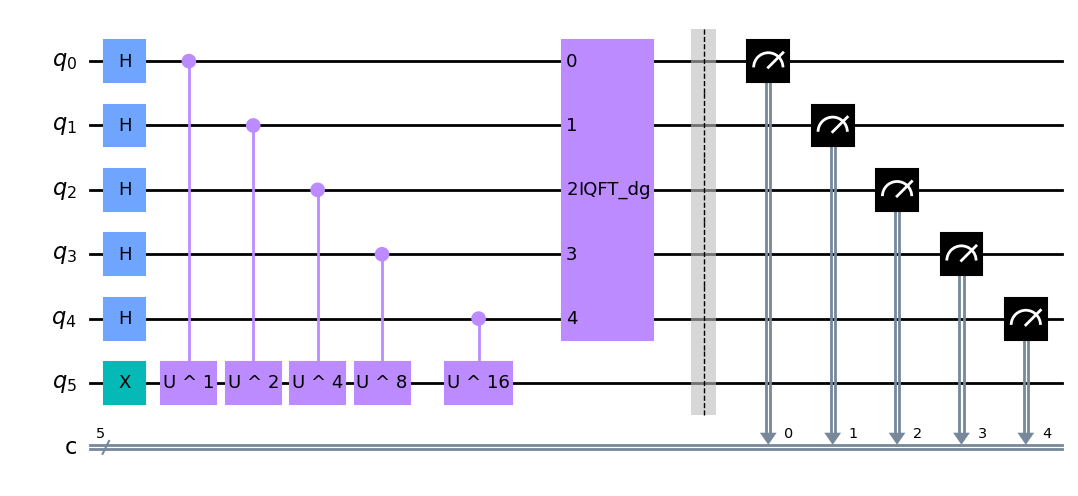

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from qiskit import Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
pi = np.pi


# Circuit creation
qpe = QuantumCircuit(6, 5)

# Apply Hadamards to the control circuit:
for q in range(5):
    qpe.h(q)

# Preparation of |psi>:
qpe.x(5)

# Controlled-U operations:
repetitions = 1
for q in range(5):
    circuit = QuantumCircuit(1)
    for i in range(repetitions):
        circuit.p(2*pi/3, 0)
    gate = circuit.to_gate(label="U ^ %d" %repetitions).control()
    gate.calibrations = circuit.calibrations
    qpe.append(gate, [q, 5]);
    repetitions *= 2

# Inverse QFT:
qpe = qpe.compose(QFT(5, inverse=True), range(5))

# Measurements
qpe.barrier()
for n in range(5):
    qpe.measure(n,n)

qpe.draw(output = 'mpl')


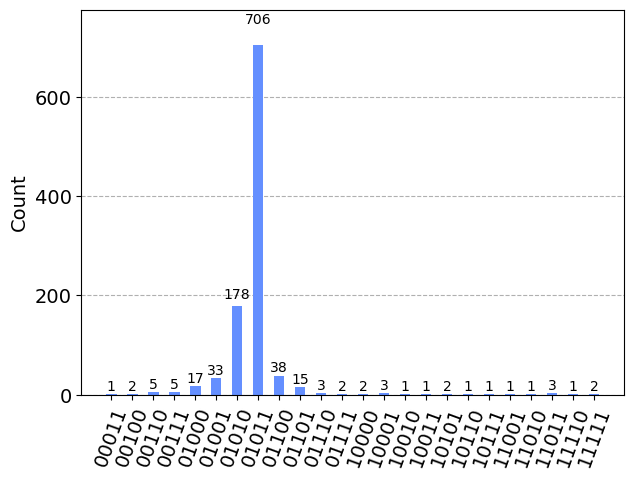

In [6]:
# Simulate the circuit and get the counts
backend = Aer.get_backend('qasm_simulator')
job = execute(qpe, backend, shots=1024)
result = job.result()
counts = result.get_counts(qpe)
plot_histogram(counts)
